In [1]:
from csv_analysis import BayesDB_Simulator, stim_analyzer, stim_conditionals
import seaborn as sb
import matplotlib

sb.set()
husl = sb.color_palette("husl",8)
cp = sb.color_palette()
#sb.palplot(husl)
#sb.set_style('ticks')
#sb.set_style('whitegrid')
sb.reset_orig()
#sb.set_style('whitegrid')
sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False, 'ytick.left': False})
matplotlib.rcParams['pdf.fonttype'] = 42
#sb.set_style('whitegrid')
sb.set_style('white')
sb.axes_style({'ytick.right':False})
#sb.set_style("ticks", {"xtick.major.size": -1, "ytick.major.size": -1})
#sb.set_style({'xtick.minor.size': 0})
sb.set_style({"xtick.direction": "in","ytick.direction": "in", 'ytick.right':False, 'ytick.left': False})
matplotlib.rcParams['pdf.fonttype'] = 42
from matplotlib import pyplot as pl
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import norm, ttest_ind, ks_2samp
import warnings
warnings.filterwarnings('ignore')


/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
#fish_id = "091418_bdb"
#file_id = "bdb_stimuli.bdb"
#bdsim = BayesDB_Simulator(fish_id, file_id, -1)
stim_data = pd.read_csv('wik_bdb/all_stimuli.csv')
random_stim_data = pd.read_csv('wik_bdb/all_stimuli_random.csv')
hittypes = [1,2,3]
az_blue = [27/255.0, 117/255.0, 187/255.0]
alt_yellow = [255/255.0, 221/255.0, 21/255.0]




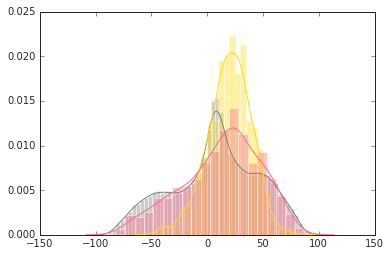

12.8071793691


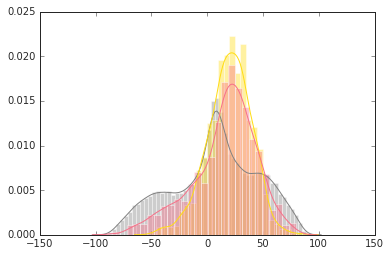

15.562226143


In [27]:
varb = "Alt Coord"
conditioning_varb = "Distance"
num_closest = 1
closest_stim = stim_conditionals(stim_data, conditioning_varb, varb, num_closest)
closest_random_stim = stim_conditionals(random_stim_data, conditioning_varb, varb, num_closest)
fig, attended, whole_dist, rank = stim_analyzer(stim_data, varb, hittypes, 1, alt_yellow, [closest_random_stim])
fig.savefig('alt_random_closest.pdf')
print np.mean(np.degrees(closest_random_stim))
fig, attended, whole_dist, rank = stim_analyzer(stim_data, varb, hittypes, 1, alt_yellow, [closest_stim])
fig.savefig('alt_real_closest.pdf')
print np.mean(np.degrees(closest_stim))

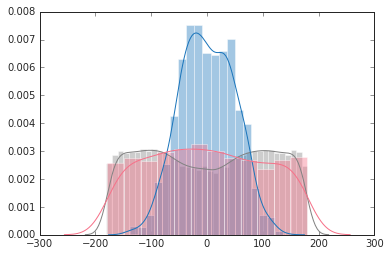

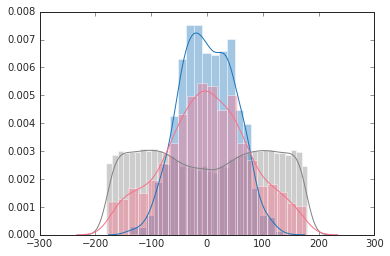

In [21]:
varb = "Az Coord"
conditioning_varb = "Distance"
num_closest = 1
hittypes = [1,2,3]
closest_stim = stim_conditionals(stim_data, conditioning_varb, varb, num_closest)
closest_random_stim = stim_conditionals(random_stim_data, conditioning_varb, varb, num_closest)
fig, attended, whole_dist, rank = stim_analyzer(stim_data, varb, hittypes, 1, az_blue, [closest_random_stim])
fig.savefig('az_random_closest.pdf')
fig, attended, whole_dist, rank = stim_analyzer(stim_data, varb, hittypes, 1, az_blue, [closest_stim])
fig.savefig('az_real_closest.pdf')

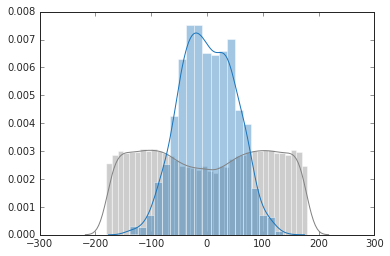

0.733766908907 0.227893615717
48.404836162 105.683897247


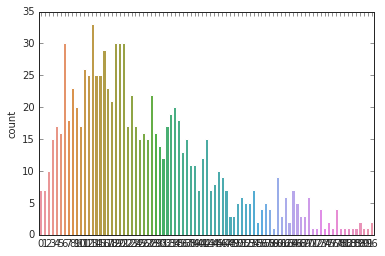

In [10]:
varb = "Az Coord"
fig, attended, whole_dist, rank = stim_analyzer(stim_data, varb, hittypes, 1, az_blue)
print np.mean(np.degrees(attended)), np.mean(np.degrees(whole_dist))
print np.std(np.degrees(attended)), np.std(np.degrees(whole_dist))
fig.savefig('azcoord_init.pdf')
sb.countplot(rank)
pl.savefig('az_counts.pdf')

In [13]:
len(attended)

961

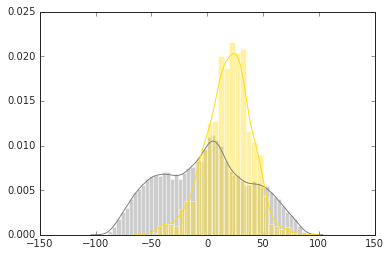

18.6306480376 -1.76272525183
20.2174658663 39.663454415


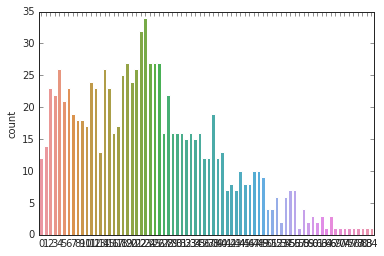

In [14]:
varb = "Alt Coord"
fig, attended, whole_dist, rank = stim_analyzer(stim_data, varb, hittypes, 0, alt_yellow)
print np.mean(np.degrees(attended)), np.mean(np.degrees(whole_dist))
print np.std(np.degrees(attended)), np.std(np.degrees(whole_dist))
fig.savefig('altcoord_init.pdf')
sb.countplot(rank)
pl.savefig('alt_counts.pdf')

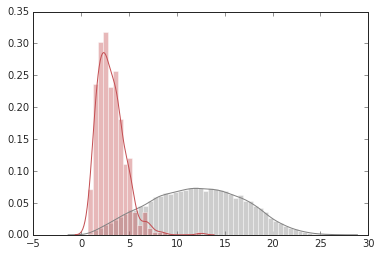

3.12261123856 12.1240742263
1.45779560035 4.81464077528
386


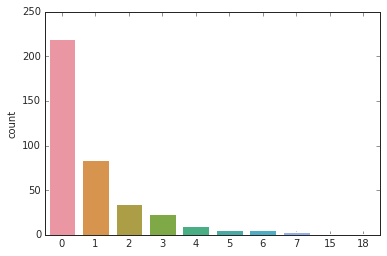

In [18]:
varb = "Distance"
fig, attended, whole_dist, rank = stim_analyzer(stim_data, varb, [1,2], 1, cp[3])
print np.mean(.0106 * attended), np.mean(.0106 * whole_dist)
print np.std(attended * .0106), np.std(whole_dist * .0106)
fig.savefig('distcoord_init.pdf')
print len(rank)
sb.countplot(rank)
pl.savefig('dist_counts.pdf')

## NOTE DONT USE THIS  IPYNB FOR VELOCITY B/C ONLY HUNTED_PARA_DESCRIPTOR USES IMMOBILIZED FISH REFERENCE